In [1]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import matplotlib.pyplot as plt
import numpy as np
import torch
import pickle

from scripts.ddqn_agent import DDQNAgent
from scripts.reinforce_agent import ReinforceMCwithoutBaselineAgent, ReinforceMCwithBaselineAgent
from scripts.training import Trainer, trainingInspector, test_agent, plot_test_results, compute_decay

## Hyperparameters

In [2]:
def episode_trigger(x):
    if x % 200 == 0:
        return True
    return False

def process_hyperparameters_ddqn(hyperparameters):
    hyperparameters.update({
        "eps_decay": compute_decay(
            hyperparameters["eps_start"],
            hyperparameters["eps_end"],
            hyperparameters["frac_episodes_to_decay"],
            hyperparameters["num_episodes"],
            hyperparameters["decay_type"]
        )
    })

    hyperparameters.pop("frac_episodes_to_decay", None)
    return hyperparameters
    
    

In [3]:
# Top 3 hyperparameter configurations
ddqn_type1_hyperparameter_list = [

    process_hyperparameters_ddqn(_) for _ in  [
    # Best performing hyperparameters
    {
        "num_episodes": 1000,
        "max_return": 500,
        "BUFFER_SIZE": int(5e6),
        "BATCH_SIZE": 1024,
        "UPDATE_EVERY": 20,
        "LR": 5e-4,
        "eps_start": 1,
        "eps_end": 0.01,
        "decay_type": "exponential",
        "frac_episodes_to_decay": 0.7
    }

]]

ddqn_type2_hyperparameter_list = [

    process_hyperparameters_ddqn(_) for _ in  [
    # Best performing hyperparameters
    {
        "num_episodes": 1000,
        "max_return": 500,
        "BUFFER_SIZE": int(5e6),
        "BATCH_SIZE": 1024,
        "UPDATE_EVERY": 20,
        "LR": 5e-4,
        "eps_start": 1,
        "eps_end": 0.01,
        "decay_type": "exponential",
        "frac_episodes_to_decay": 0.7
    }

]]

reinforce_type1_hyperparameter_list = [
    # Best performing hyperparameters
    {
        "num_episodes": 2000,
        "max_return": 500,
        "LR_POLICY": 3e-3,
    }    
]

reinforce_type2_hyperparameter_list = [
    # Best performing hyperparameters
    {
        "num_episodes": 2000,
        "max_return": 500,
        "LR_POLICY": 5e-4,
        "LR_VALUE": 5e-4
    }    
]


## Running Experiments

In [ ]:
env = gym.make('Acrobot-v1', render_mode="rgb_array")
env = RecordVideo(
    env,
    video_folder="backups/acrobot-ddqn-type1-visualizations",
    name_prefix="eval",
    episode_trigger=episode_trigger
)

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = 'cpu'
ddqn_type1_agent = DDQNAgent(
    state_space=env.observation_space,
    action_space=env.action_space,
    network_type=2,
    device = device,
    seed=0
)

trainer = Trainer()
ddqn_type1_results = test_agent(env, ddqn_type1_agent, trainer, ddqn_type1_hyperparameter_list, num_experiments=1)

env.close()

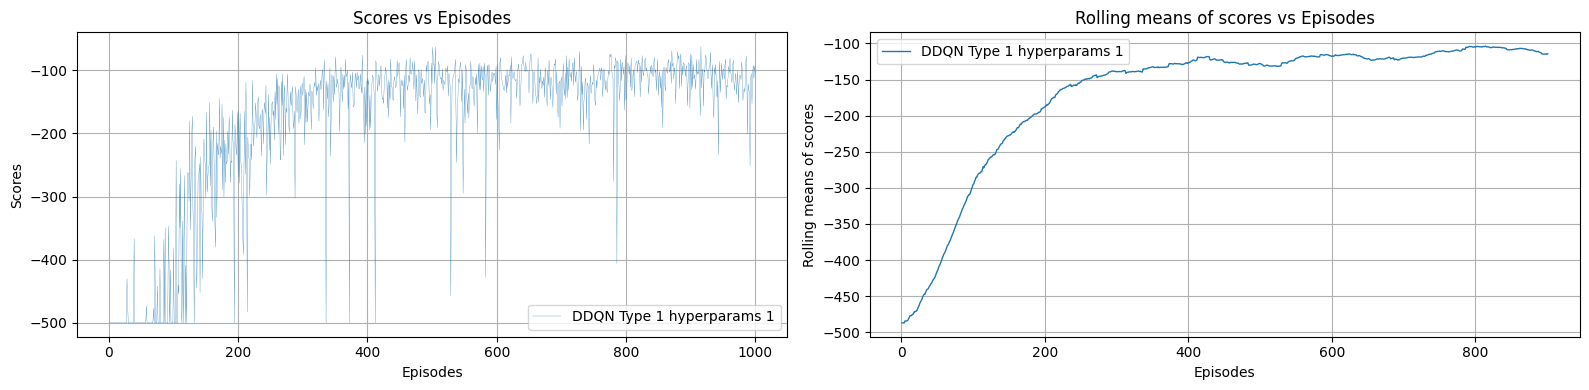

In [5]:
combined_results = ddqn_type1_results

# with open("backups/cartpole-plots/cartpole_ddqn_type1_results.pickle", 'wb') as handle:
#     pickle.dump(ddqn_type1_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

plot_test_results(combined_results, [0])

## REINFORCE

In [5]:
env = gym.make('Acrobot-v1', render_mode="rgb_array")
env = RecordVideo(
    env,
    video_folder="backups/acrobot-reinforce-type1-visualizations",
    name_prefix="eval",
    episode_trigger=episode_trigger
)

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = 'cpu'
reinforce_type1_agent = ReinforceMCwithoutBaselineAgent(
    state_space=env.observation_space,
    action_space=env.action_space,
    device = device,
    seed=0
)
reinforce_type2_agent = ReinforceMCwithBaselineAgent(
    state_space=env.observation_space,
    action_space=env.action_space,
    device = device,
    seed=0
)

trainer = Trainer()
reinforce_type1_results = test_agent(env, reinforce_type1_agent, trainer, reinforce_type1_hyperparameter_list, num_experiments=5)
# reinforce_type2_results = test_agent(env, reinforce_type2_agent, trainer, reinforce_type2_hyperparameter_list, num_experiments=1)

env.close()

/home/lalit/my_venvs/rl_env/lib/python3.10/site-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /home/lalit/acads/DA6400/Assignment2/DA6400_RL_PA2/backups/acrobot-reinforce-type1-visualizations folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [07:22<00:00,  4.52it/s, Mean Score=-500]


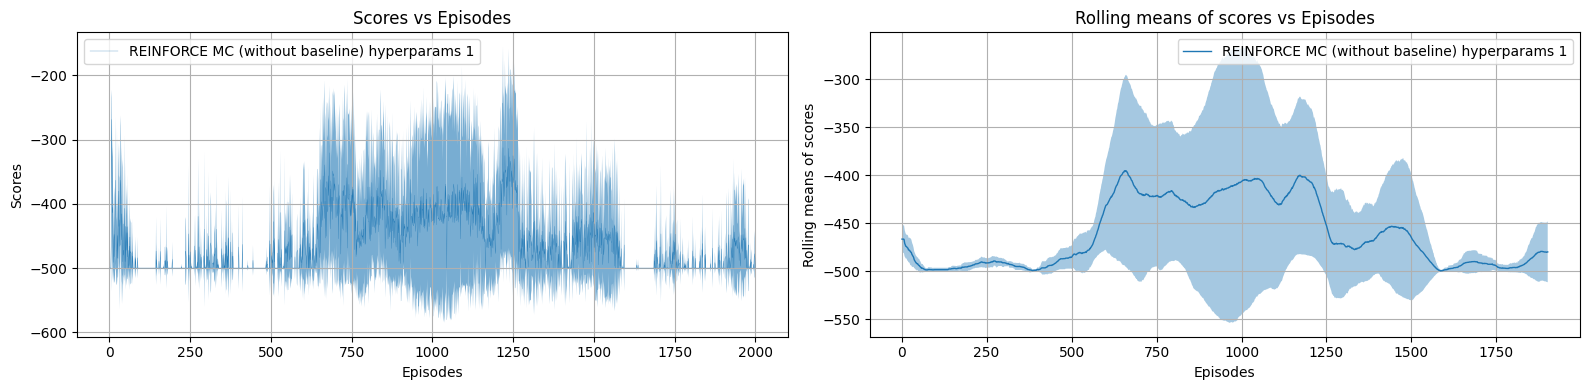

In [6]:
# combined_results = reinforce_type1_results + reinforce_type2_results

# with open("backups/cartpole-plots/cartpole_ddqn_type1_results.pickle", 'wb') as handle:
#     pickle.dump(ddqn_type1_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

# plot_test_results(combined_results, [0,1])
plot_test_results(reinforce_type1_results, [0])
# plot_test_results(reinforce_type2_results, [0])